In [ ]:
import pandas as pd
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
df=pd.read_csv('/content/Ecommerce_data.csv',encoding="ISO-8859-1")

In [ ]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [ ]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
df.dtypes


InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [ ]:
df=df.dropna(subset=['Description'])
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [ ]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133626
Country             0
dtype: int64

In [ ]:
df['Description']

0          WHITE HANGING HEART T-LIGHT HOLDER
1                         WHITE METAL LANTERN
2              CREAM CUPID HEARTS COAT HANGER
3         KNITTED UNION FLAG HOT WATER BOTTLE
4              RED WOOLLY HOTTIE WHITE HEART.
                         ...                 
541904            PACK OF 20 SPACEBOY NAPKINS
541905           CHILDREN'S APRON DOLLY GIRL 
541906          CHILDRENS CUTLERY DOLLY GIRL 
541907        CHILDRENS CUTLERY CIRCUS PARADE
541908          BAKING SET 9 PIECE RETROSPOT 
Name: Description, Length: 540455, dtype: object

In [ ]:
df['Description'] = df['Description'].str.replace('\d+', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## Word Tokenisation

In [ ]:
df['Word_Description']=df.loc[:,"Description"].apply(lambda x: nltk.word_tokenize(str(x).lower()))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## Puntuation Removal

In [ ]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer('\w+')


In [ ]:
df['Punctuation_Description']=df.loc[:,"Word_Description"].apply(lambda x: tokenizer.tokenize(str(x)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Word_Description,Punctuation_Description
541904,581587,22613,PACK OF SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,"[pack, of, spaceboy, napkins]","[pack, of, spaceboy, napkins]"
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,"[children, 's, apron, dolly, girl]","[children, s, apron, dolly, girl]"
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,"[childrens, cutlery, dolly, girl]","[childrens, cutlery, dolly, girl]"
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,"[childrens, cutlery, circus, parade]","[childrens, cutlery, circus, parade]"
541908,581587,22138,BAKING SET PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France,"[baking, set, piece, retrospot]","[baking, set, piece, retrospot]"


## Stop Words Removal

In [ ]:
from nltk.corpus import stopwords
stop_words = stopwords.words("english")
df['Stop_words_rem_description'] = df['Punctuation_Description'].apply(lambda x: [word for word in x if word not in (stop_words)])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df.count()

InvoiceNo                     540455
StockCode                     540455
Description                   540455
Quantity                      540455
InvoiceDate                   540455
UnitPrice                     540455
CustomerID                    406829
Country                       540455
Word_Description              540455
Punctuation_Description       540455
Stop_words_rem_description    540455
dtype: int64

In [ ]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Word_Description,Punctuation_Description,Stop_words_rem_description
541904,581587,22613,PACK OF SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,"[pack, of, spaceboy, napkins]","[pack, of, spaceboy, napkins]","[pack, spaceboy, napkins]"
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,"[children, 's, apron, dolly, girl]","[children, s, apron, dolly, girl]","[children, apron, dolly, girl]"
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,"[childrens, cutlery, dolly, girl]","[childrens, cutlery, dolly, girl]","[childrens, cutlery, dolly, girl]"
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,"[childrens, cutlery, circus, parade]","[childrens, cutlery, circus, parade]","[childrens, cutlery, circus, parade]"
541908,581587,22138,BAKING SET PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France,"[baking, set, piece, retrospot]","[baking, set, piece, retrospot]","[baking, set, piece, retrospot]"


## Lematisation and Pos Taging

In [ ]:
# Begin Lemmatization 
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
#nltk.download('averaged_perceptron_tagger') # Run atleast once 

# function to convert nltk tag to wordnet tag
lemmatizer = WordNetLemmatizer()

# Finds the part of speech tag
# Convert the detailed POS tag into a shallow information
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

# lemmatize sentence using pos tag
def lemmatize_sentence(list_words):
  # word tokenize -> pos tag (detailed) -> wordnet tag (shallow pos) -> lemmatizer -> root word
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(list_words)  
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            #else use the tag to lemmatize the token
            
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)
df['lematizer_des'] = df['Stop_words_rem_description'].apply(lambda x: lemmatize_sentence(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Word_Description,Punctuation_Description,Stop_words_rem_description,lematizer_des
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,"[white, hanging, heart, t-light, holder]","[white, hanging, heart, t, light, holder]","[white, hanging, heart, light, holder]",white hang heart light holder
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,"[white, metal, lantern]","[white, metal, lantern]","[white, metal, lantern]",white metal lantern
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,"[cream, cupid, hearts, coat, hanger]","[cream, cupid, hearts, coat, hanger]","[cream, cupid, hearts, coat, hanger]",cream cupid heart coat hanger
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,"[knitted, union, flag, hot, water, bottle]","[knitted, union, flag, hot, water, bottle]","[knitted, union, flag, hot, water, bottle]",knit union flag hot water bottle
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,"[red, woolly, hottie, white, heart, .]","[red, woolly, hottie, white, heart]","[red, woolly, hottie, white, heart]",red woolly hottie white heart


In [ ]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Word_Description,Punctuation_Description,Stop_words_rem_description,lematizer_des
541904,581587,22613,PACK OF SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,"[pack, of, spaceboy, napkins]","[pack, of, spaceboy, napkins]","[pack, spaceboy, napkins]",pack spaceboy napkin
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,"[children, 's, apron, dolly, girl]","[children, s, apron, dolly, girl]","[children, apron, dolly, girl]",child apron dolly girl
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,"[childrens, cutlery, dolly, girl]","[childrens, cutlery, dolly, girl]","[childrens, cutlery, dolly, girl]",childrens cutlery dolly girl
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,"[childrens, cutlery, circus, parade]","[childrens, cutlery, circus, parade]","[childrens, cutlery, circus, parade]",childrens cutlery circus parade
541908,581587,22138,BAKING SET PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France,"[baking, set, piece, retrospot]","[baking, set, piece, retrospot]","[baking, set, piece, retrospot]",bake set piece retrospot


In [ ]:
df1=df['lematizer_des'].drop_duplicates()
df1=pd.DataFrame(df1)
df1=df1.reset_index(drop=True)
df1

,lematizer_des
0,white hang heart light holder
1,white metal lantern
2,cream cupid heart coat hanger
3,knit union flag hot water bottle
4,red woolly hottie white heart
...,...
4042,letter u bling key ring
4043,wet box
4044,mixed
4045,cream hang heart light holder


In [ ]:
df1.isna().sum()

lematizer_des    0
dtype: int64

## Count Plot

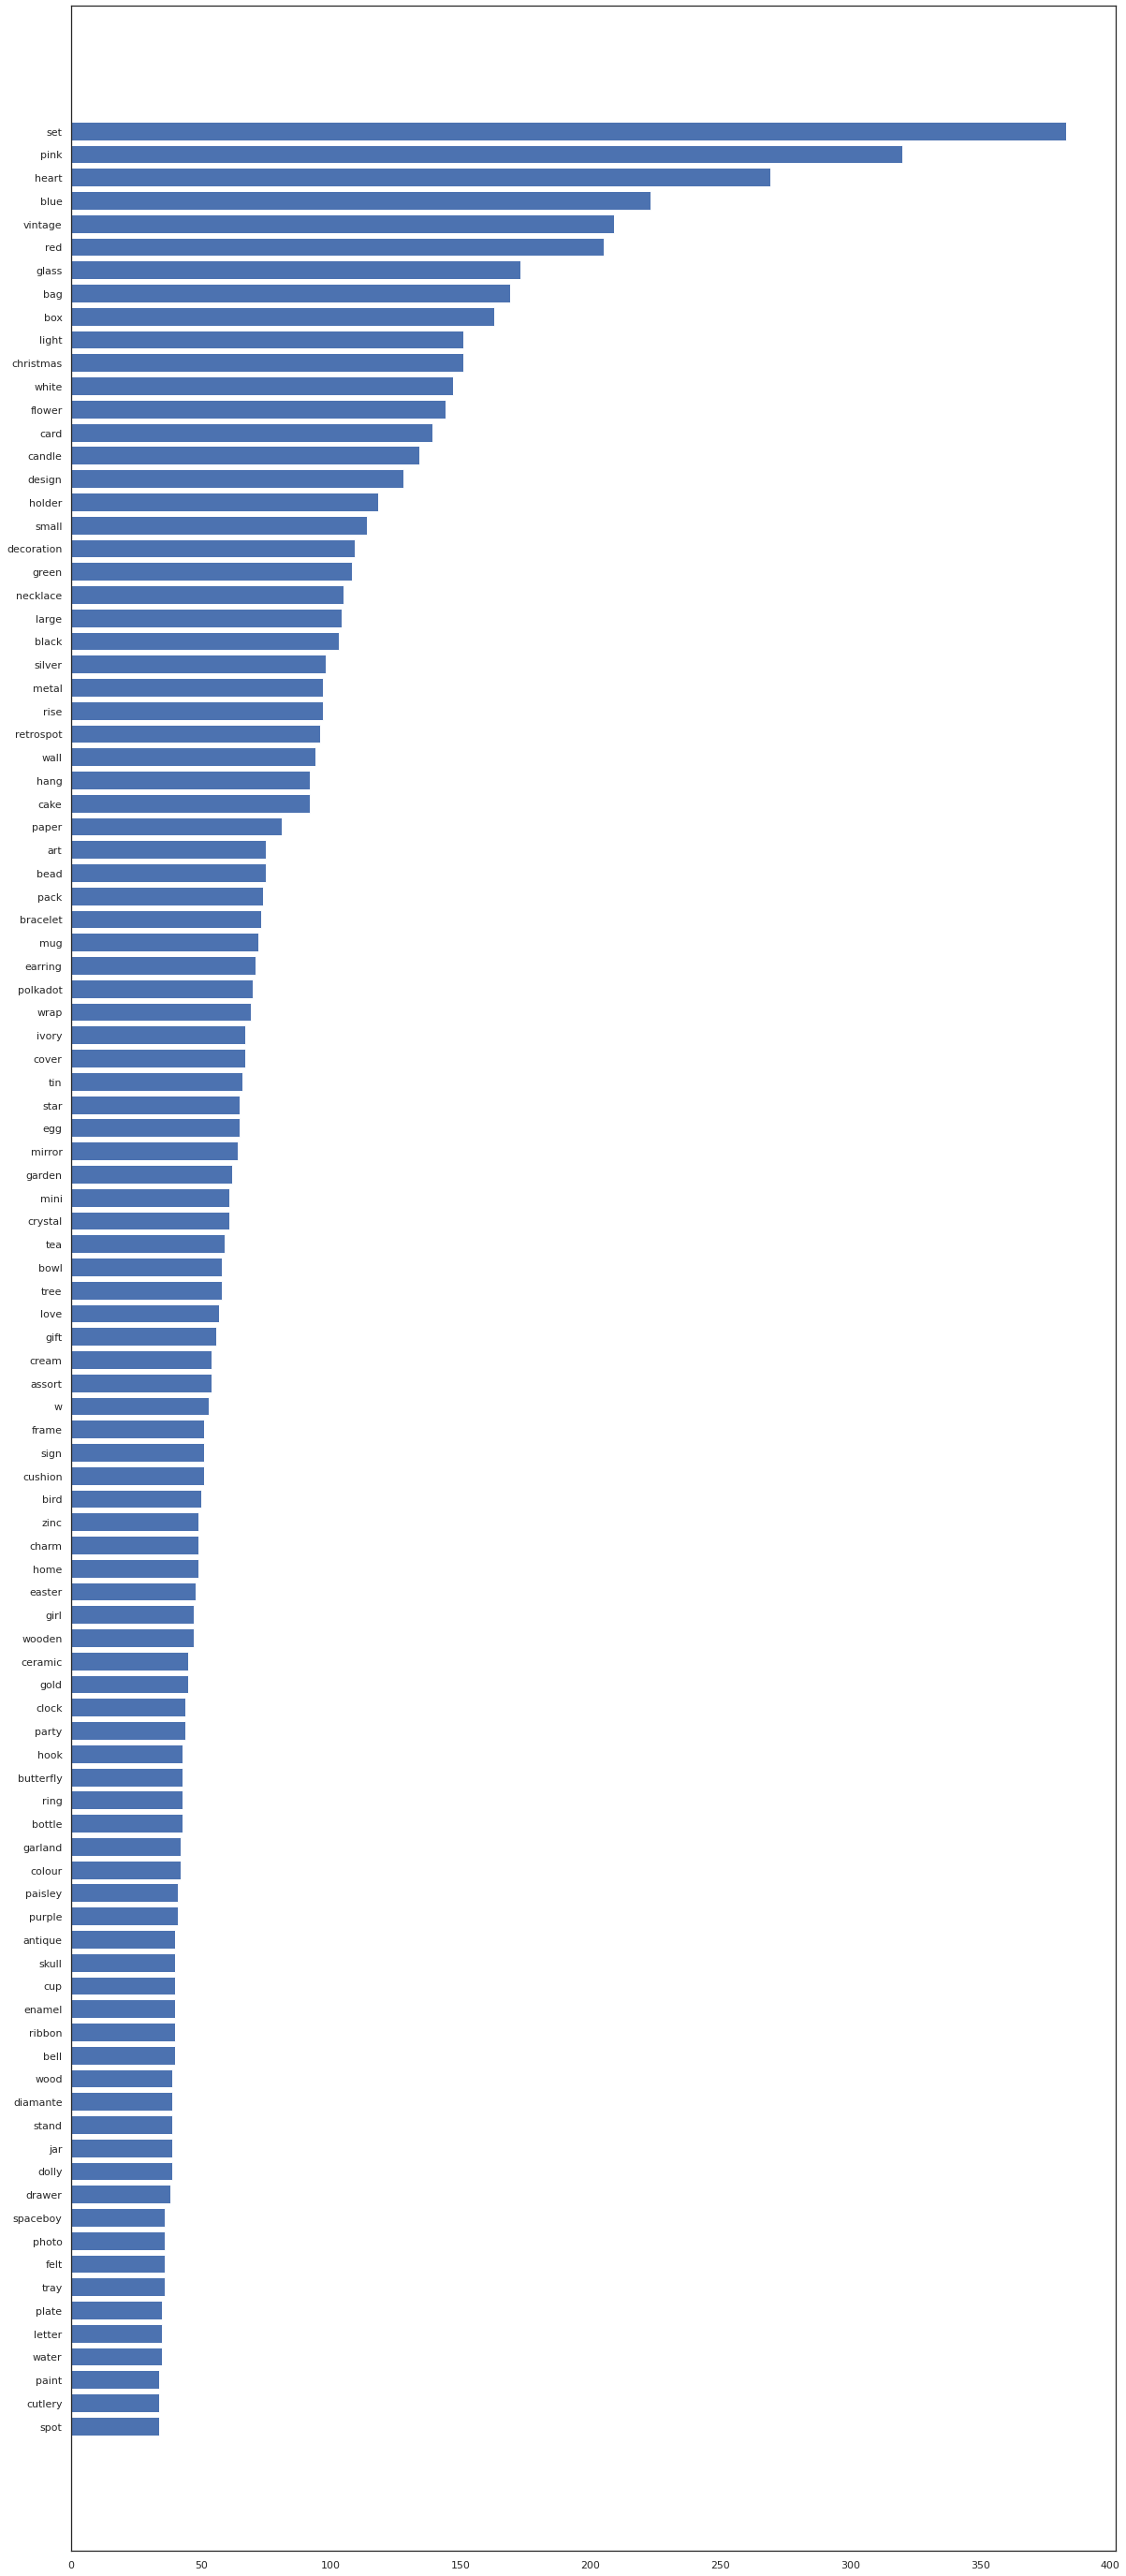

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'white')
from nltk import FreqDist #function to find the frequent words in the data


#Extracts words into list and count frequency
all_words = ' '.join([text for text in df1['lematizer_des']])
all_words = all_words.split()
words_df = FreqDist(all_words)

# Extracting words and frequency from words_df object
words_df = pd.DataFrame({'word':list(words_df.keys()), 'count':list(words_df.values())})
words_df
# Subsets top 30 words by frequency
words_df = words_df.nlargest(columns="count", n =100) 

words_df.sort_values('count',inplace = True)
words_df

# Plotting 30 frequent words
plt.figure(figsize=(20,50))
ax = plt.barh(words_df['word'], width = words_df['count'])
plt.show()

## Word Cloud

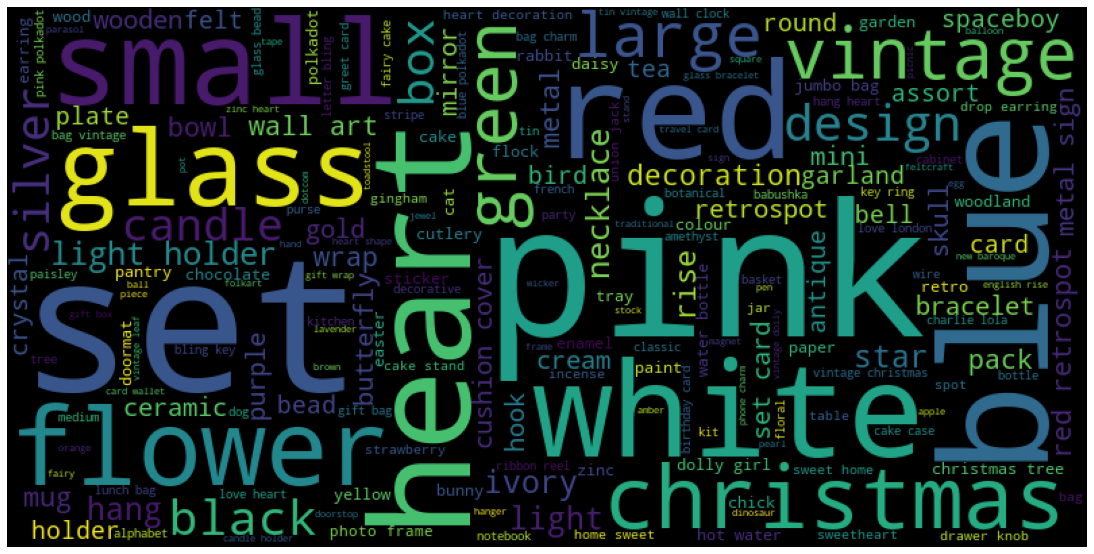

In [ ]:
from wordcloud import WordCloud
for_wordcloud_str = ' '.join([text for text in df1['lematizer_des']])

wordcloud = WordCloud(width=800, height=400, background_color ='black',
                      min_font_size = 7).generate(for_wordcloud_str)

plt.figure(figsize=(15, 10), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
 
plt.show()

## Count vecterisation Frequency Method

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# Step 2. Design the Vocabulary
# The default token pattern removes tokens of a single character. That's why we don't have the "I" and "s" tokens in the output
count_vectorizer = CountVectorizer(binary=False)
# Step 3. Create the Bag-of-Words Model
count_values = count_vectorizer.fit_transform(df1['lematizer_des']).toarray() # fit - design the vocbulary and transform will convert the text into numbers based on the presence of the word
# Show the Bag-of-Words Model as a pandas DataFrame
feature_names = count_vectorizer.get_feature_names()
df2_count=pd.DataFrame(count_values, columns = feature_names)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## Elbow Plot

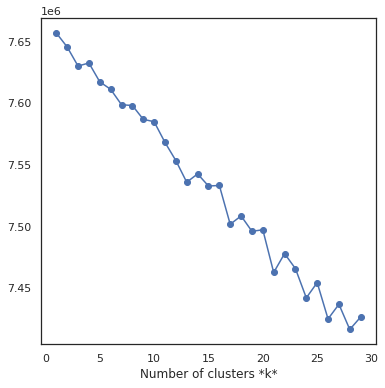

In [ ]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
X=scale.fit_transform(count_values)
inertias = []
list_k = list(range(1,30))
from sklearn.cluster import KMeans
for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X)
    inertias.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, inertias, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel(''); 

### Kmeans clustering

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
km = KMeans(n_clusters=20) 
km.fit(X) 
centroids = km.cluster_centers_ 
centroids


array([[-1.57212495e-02, -2.72367355e-02, -3.85328560e-02, ...,
        -2.22359524e-02, -1.57212495e-02, -1.10707398e-01],
       [ 1.14616745e-03,  1.98571110e-03, -3.85328560e-02, ...,
         1.62112590e-03, -1.57212495e-02,  7.99032990e-04],
       [-1.57212495e-02, -2.72367355e-02, -3.85328560e-02, ...,
        -2.22359524e-02, -1.57212495e-02, -1.10707398e-01],
       ...,
       [-1.57212495e-02, -2.72367355e-02, -3.85328560e-02, ...,
        -2.22359524e-02, -1.57212495e-02, -1.10707398e-01],
       [-1.57212495e-02, -2.72367355e-02,  2.59518785e+01, ...,
        -2.22359524e-02, -1.57212495e-02, -1.10707398e-01],
       [-1.57212495e-02, -2.72367355e-02, -3.85328560e-02, ...,
        -2.22359524e-02, -1.57212495e-02, -1.10707398e-01]])

In [ ]:
km.inertia_

7480757.128500574

In [ ]:
km.labels_

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [ ]:
df2=pd.DataFrame(km.labels_,columns=['Group_no'],index=None)
df2

,Group_no
0,1
1,1
2,1
3,1
4,1
...,...
4042,1
4043,1
4044,1
4045,1


In [ ]:
df1


,lematizer_des
0,white hang heart light holder
1,white metal lantern
2,cream cupid heart coat hanger
3,knit union flag hot water bottle
4,red woolly hottie white heart
...,...
4042,letter u bling key ring
4043,wet box
4044,mixed
4045,cream hang heart light holder


In [ ]:
df3=pd.concat([df1,df2],axis=1)
df3

,lematizer_des,Group_no
0,white hang heart light holder,1
1,white metal lantern,1
2,cream cupid heart coat hanger,1
3,knit union flag hot water bottle,1
4,red woolly hottie white heart,1
...,...,...
4042,letter u bling key ring,1
4043,wet box,1
4044,mixed,1
4045,cream hang heart light holder,1


In [ ]:
df4=pd.merge(df,df3,how='left', on='lematizer_des')

In [ ]:
df4

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Word_Description,Punctuation_Description,Stop_words_rem_description,lematizer_des,Group_no
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,"[white, hanging, heart, t-light, holder]","[white, hanging, heart, t, light, holder]","[white, hanging, heart, light, holder]",white hang heart light holder,1
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,"[white, metal, lantern]","[white, metal, lantern]","[white, metal, lantern]",white metal lantern,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,"[cream, cupid, hearts, coat, hanger]","[cream, cupid, hearts, coat, hanger]","[cream, cupid, hearts, coat, hanger]",cream cupid heart coat hanger,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,"[knitted, union, flag, hot, water, bottle]","[knitted, union, flag, hot, water, bottle]","[knitted, union, flag, hot, water, bottle]",knit union flag hot water bottle,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,"[red, woolly, hottie, white, heart, .]","[red, woolly, hottie, white, heart]","[red, woolly, hottie, white, heart]",red woolly hottie white heart,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540450,581587,22613,PACK OF SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,"[pack, of, spaceboy, napkins]","[pack, of, spaceboy, napkins]","[pack, spaceboy, napkins]",pack spaceboy napkin,1
540451,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,"[children, 's, apron, dolly, girl]","[children, s, apron, dolly, girl]","[children, apron, dolly, girl]",child apron dolly girl,1
540452,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,"[childrens, cutlery, dolly, girl]","[childrens, cutlery, dolly, girl]","[childrens, cutlery, dolly, girl]",childrens cutlery dolly girl,1
540453,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,"[childrens, cutlery, circus, parade]","[childrens, cutlery, circus, parade]","[childrens, cutlery, circus, parade]",childrens cutlery circus parade,1


In [ ]:
df4.isna().sum()

InvoiceNo                          0
StockCode                          0
Description                        0
Quantity                           0
InvoiceDate                        0
UnitPrice                          0
CustomerID                    133626
Country                            0
Word_Description                   0
Punctuation_Description            0
Stop_words_rem_description         0
lematizer_des                      0
Group_no                           0
dtype: int64

In [ ]:
df5=df4.drop(columns=['Stop_words_rem_description','Punctuation_Description','Word_Description','InvoiceNo','StockCode','InvoiceDate','lematizer_des','Description'])
df5=df5.dropna()
df5=df5.reset_index(drop=True)

In [ ]:
df5

,Quantity,UnitPrice,CustomerID,Country,Group_no
0,6,2.55,17850.0,United Kingdom,1
1,6,3.39,17850.0,United Kingdom,1
2,8,2.75,17850.0,United Kingdom,1
3,6,3.39,17850.0,United Kingdom,1
4,6,3.39,17850.0,United Kingdom,1
...,...,...,...,...,...
406824,12,0.85,12680.0,France,1
406825,6,2.10,12680.0,France,1
406826,4,4.15,12680.0,France,1
406827,4,4.15,12680.0,France,1


As of now we found the groups now we are going to create k coloums in original dataset

In [ ]:
df6=pd.concat([df5, pd.get_dummies(df5["Group_no"])],axis=1)
df6

,Quantity,UnitPrice,CustomerID,Country,Group_no,0,1,2,4,5,7,8,9,10,13,14,15,17,18,19
0,6,2.55,17850.0,United Kingdom,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,6,3.39,17850.0,United Kingdom,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,8,2.75,17850.0,United Kingdom,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,6,3.39,17850.0,United Kingdom,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,6,3.39,17850.0,United Kingdom,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406824,12,0.85,12680.0,France,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
406825,6,2.10,12680.0,France,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
406826,4,4.15,12680.0,France,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
406827,4,4.15,12680.0,France,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df6.tail()

,Quantity,UnitPrice,CustomerID,Country,Group_no,0,1,2,4,5,7,8,9,10,13,14,15,17,18,19
406824,12,0.85,12680.0,France,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
406825,6,2.10,12680.0,France,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
406826,4,4.15,12680.0,France,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
406827,4,4.15,12680.0,France,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
406828,3,4.95,12680.0,France,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


## Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
en=LabelEncoder()
Encode_coun=en.fit_transform(df6['Country'])
df7=pd.DataFrame(Encode_coun,columns=['Encode_coun'])
df7

,Encode_coun
0,35
1,35
2,35
3,35
4,35
...,...
406824,13
406825,13
406826,13
406827,13


In [ ]:
df8=pd.concat([df6,df7],axis=1)
df8=df8.dropna()
df8.CustomerID = df8.CustomerID.astype(int)
df8=df8.drop(columns=['Country','Group_no'])
df8

,Quantity,UnitPrice,CustomerID,0,1,2,4,5,7,8,9,10,13,14,15,17,18,19,Encode_coun
0,6,2.55,17850,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,35
1,6,3.39,17850,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,35
2,8,2.75,17850,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,35
3,6,3.39,17850,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,35
4,6,3.39,17850,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406824,12,0.85,12680,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,13
406825,6,2.10,12680,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,13
406826,4,4.15,12680,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,13
406827,4,4.15,12680,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,13


In [ ]:
df9=df8.groupby('CustomerID').mean()
df9=df9.reset_index(drop=True)


In [ ]:
df9

,Quantity,UnitPrice,0,1,2,4,5,7,8,9,10,13,14,15,17,18,19,Encode_coun
0,0.000000,1.040000,0.000000,1.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,35.0
1,13.505495,2.644011,0.000000,0.818681,0.0,0.159341,0.0,0.0,0.010989,0.005495,0.0,0.005495,0.0,0.000000,0.0,0.0,0.0,16.0
2,75.516129,5.764839,0.000000,0.774194,0.0,0.064516,0.0,0.0,0.000000,0.161290,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,12.0
3,8.643836,8.289041,0.000000,0.917808,0.0,0.082192,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,18.0
4,11.588235,3.841176,0.000000,0.941176,0.0,0.058824,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4367,4.500000,4.765000,0.000000,0.800000,0.0,0.200000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,35.0
4368,7.714286,5.622857,0.000000,1.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,35.0
4369,7.538462,4.821538,0.076923,0.846154,0.0,0.076923,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,35.0
4370,1.847884,1.614987,0.000000,0.867725,0.0,0.130952,0.0,0.0,0.000000,0.001323,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,35.0


In [ ]:
df10=df8['CustomerID'].sort_values()
df10=df10.drop_duplicates()
df10=df10.reset_index(drop=True)
df10

0       12346
1       12347
2       12348
3       12349
4       12350
        ...  
4367    18280
4368    18281
4369    18282
4370    18283
4371    18287
Name: CustomerID, Length: 4372, dtype: int64

In [ ]:
df11=pd.concat([df10,df9],axis=1)

In [ ]:
df11

,CustomerID,Quantity,UnitPrice,0,1,2,4,5,7,8,9,10,13,14,15,17,18,19,Encode_coun
0,12346,0.000000,1.040000,0.000000,1.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,35.0
1,12347,13.505495,2.644011,0.000000,0.818681,0.0,0.159341,0.0,0.0,0.010989,0.005495,0.0,0.005495,0.0,0.000000,0.0,0.0,0.0,16.0
2,12348,75.516129,5.764839,0.000000,0.774194,0.0,0.064516,0.0,0.0,0.000000,0.161290,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,12.0
3,12349,8.643836,8.289041,0.000000,0.917808,0.0,0.082192,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,18.0
4,12350,11.588235,3.841176,0.000000,0.941176,0.0,0.058824,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4367,18280,4.500000,4.765000,0.000000,0.800000,0.0,0.200000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,35.0
4368,18281,7.714286,5.622857,0.000000,1.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,35.0
4369,18282,7.538462,4.821538,0.076923,0.846154,0.0,0.076923,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,35.0
4370,18283,1.847884,1.614987,0.000000,0.867725,0.0,0.130952,0.0,0.0,0.000000,0.001323,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,35.0


In [ ]:
df11['CustomerID'].isna().sum()

0

K-Means with all features

In [ ]:
val=df9.values

In [ ]:
val

array([[1.23460000e+04, 0.00000000e+00, 1.04000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 3.50000000e+01],
       [1.23470000e+04, 1.35054945e+01, 2.64401099e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.60000000e+01],
       [1.23480000e+04, 7.55161290e+01, 5.76483871e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.20000000e+01],
       ...,
       [1.82820000e+04, 7.53846154e+00, 4.82153846e+00, ...,
        0.00000000e+00, 0.00000000e+00, 3.50000000e+01],
       [1.82830000e+04, 1.84788360e+00, 1.61498677e+00, ...,
        0.00000000e+00, 0.00000000e+00, 3.50000000e+01],
       [1.82870000e+04, 2.26571429e+01, 1.49357143e+00, ...,
        0.00000000e+00, 0.00000000e+00, 3.50000000e+01]])

## Elbow Plot

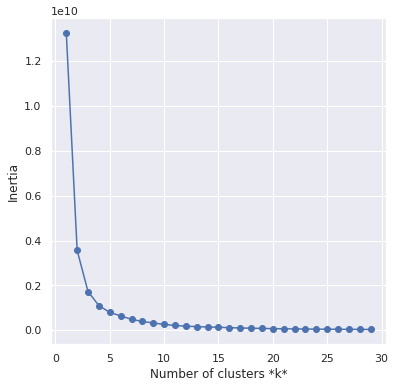

In [ ]:
inertias = []
list_k = list(range(1,30))
from sklearn.cluster import KMeans
for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(val)
    inertias.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, inertias, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Inertia'); 

In [ ]:
km = KMeans(n_clusters=10) 
km.fit(val) 

KMeans(n_clusters=10)

In [ ]:
km.inertia_

271805175.08377624

In [ ]:
cus_group=pd.DataFrame(km.labels_,columns=['customer_Group'])
cus_group

,customer_Group
0,3
1,3
2,3
3,3
4,3
...,...
4367,0
4368,0
4369,0
4370,0


In [ ]:
fin=pd.concat([df11['CustomerID'],cus_group],axis=1)
fin

,CustomerID,customer_Group
0,12346,3
1,12347,3
2,12348,3
3,12349,3
4,12350,3
...,...,...
4367,18280,0
4368,18281,0
4369,18282,0
4370,18283,0


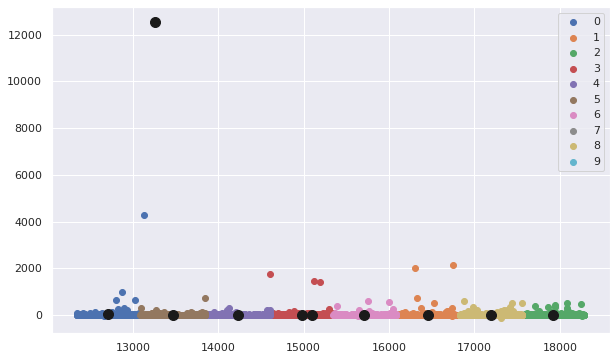

In [ ]:
#Getting the Centroids
import numpy as np
centroids = km.cluster_centers_
label=km.fit_predict(val)
labels = np.unique(label)
 
#plotting the results:

plt.figure(figsize=(10, 6)) 
for i in labels:
    plt.scatter(val[label == i , 0] , val[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 100, color = 'k')
plt.legend()
plt.show()